In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd


Loading MNIST Dataset and Class Labels


In [72]:
from keras.datasets  import mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()
mnist_class=[0,1,2,3,4,5,6,7,8,9]



Loading MNIST Dataset and Class Labels


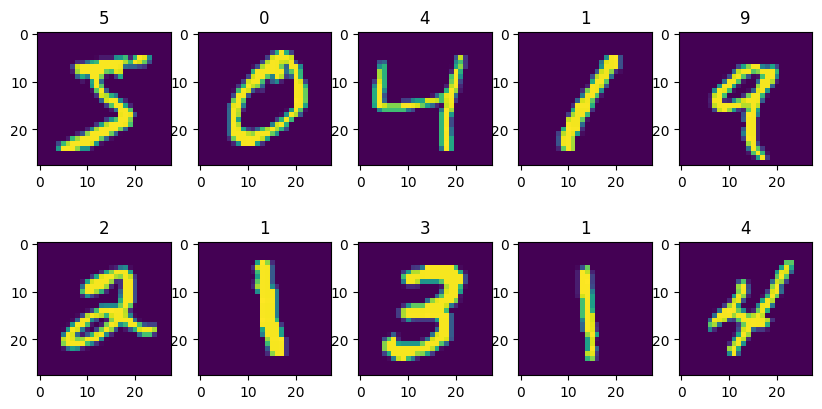

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_img[i])# No cmap specified for displaying RGB images
    plt.title(mnist_class[train_label[i]])
plt.tight_layout
plt.show()

To Find the No of Target Classes

In [74]:
n=len(set(test_label.flatten()))
print("No of target classes=",n)

No of target classes= 10


In [75]:
print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Shape of Training image dataset: (60000, 28, 28)
Shape of Training image label: (60000,)
Shape of Testing image dataset: (10000, 28, 28)
Shape of Testing image label: (10000,)
Shape of image in dataset : (28, 28)


Resizing image of (28,28,1) To (32,32,3)

In [76]:
#Adding tf.newaxis to convert the image with shape (width,height) into a shape (width, height, 1)
train_img=train_img[...,tf.newaxis]
test_img=test_img[...,tf.newaxis]

#Using tf.image.resize() to resize[(28,28)-->(32,32)] the image while maintaining the single channel
train_img=tf.image.resize(train_img,(32,32))
test_img=tf.image.resize(test_img,(32,32))

# Repeat the single channel three times along the last axis to convert to a three-channel image
train_img=tf.repeat(train_img,3,axis=-1)
test_img=tf.repeat(test_img,3,axis=-1)

#Converted into a NumPy array
train_img=train_img.numpy()
test_img=test_img.numpy()



#train_img= np.repeat(tf.image.resize(train_img[...,np.newaxis],(32,32)).numpy(),3,axis=-1)
#test_img = np.repeat(tf.image.resize(test_img[...,np.newaxis],(32,32)).numpy(),3,axis=-1)

In [77]:
train_img=train_img.astype("float32")/255
test_img=test_img.astype("float32")/255

from keras.utils import to_categorical

train_label=to_categorical(train_label,num_classes=n)
test_label=to_categorical(test_label,num_classes=n)

print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Shape of Training image dataset: (60000, 32, 32, 3)
Shape of Training image label: (60000, 10)
Shape of Testing image dataset: (10000, 32, 32, 3)
Shape of Testing image label: (10000, 10)
Shape of image in dataset : (32, 32, 3)


Pre-Trained Model [VGG16]

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

train_img=preprocess_input(train_img)
test_img=preprocess_input(test_img)


In [79]:
base_model=VGG19(weights="imagenet",include_top=False,input_shape=train_img[0].shape)
base_model.trainable=False
base_model.summary()

flatten=Flatten()
dense=Dense(128,activation='relu')
prediction_layer=Dense(n,activation='softmax')


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [82]:
model=Sequential([base_model,flatten,dense,prediction_layer])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_img,train_label,validation_split=0.2,epochs=5,batch_size=64)
loss,accuracy=model.evaluate(test_img,test_label)


print("loss:",{loss})
print("accuracy:",{accuracy})

Epoch 1/5
750/750 [==============================] - 192s 255ms/step - loss: 1.9039 - accuracy: 0.3398 - val_loss: 1.5384 - val_accuracy: 0.5472
Epoch 2/5
750/750 [==============================] - 187s 249ms/step - loss: 1.4191 - accuracy: 0.5345 - val_loss: 1.2532 - val_accuracy: 0.6243
Epoch 3/5
750/750 [==============================] - 184s 246ms/step - loss: 1.1905 - accuracy: 0.6189 - val_loss: 1.0639 - val_accuracy: 0.6864
Epoch 4/5
750/750 [==============================] - 182s 242ms/step - loss: 1.0406 - accuracy: 0.6745 - val_loss: 0.9174 - val_accuracy: 0.7306
Epoch 5/5
313/313 [==============================] - 29s 94ms/step - loss: 0.8522 - accuracy: 0.7357
loss: {0.8521621227264404}
accuracy: {0.7357000112533569}


<function matplotlib.pyplot.show(close=None, block=None)>

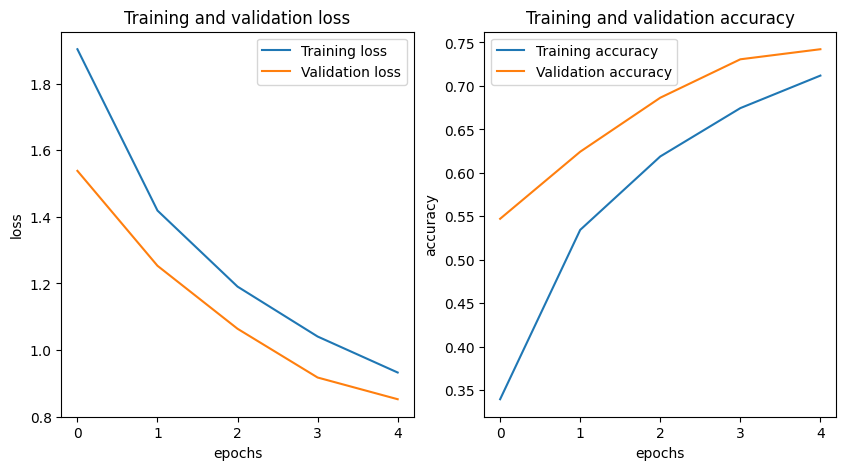

In [83]:

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show

Prediction for a Single Image

In [84]:
sample_image=test_img[10]
sample_image=np.expand_dims(sample_image,axis=0)
predictions=model.predict(sample_image)
predicted_class=np.argmax(predictions,axis=1)
print(mnist_class[predicted_class[0]])

1/1 [==============================] - 0s 193ms/step
0



Making Predictions on Test Dataset

In [85]:
prediction=model.predict(test_img)
prediction_classes=np.argmax(prediction,axis=1)

print(prediction)
print(prediction_classes)
for l in range(10):
    print(mnist_class[prediction_classes[l]])

313/313 [==============================] - 37s 117ms/step
[[6.81764912e-04 3.01268492e-02 2.31288327e-03 ... 8.69067967e-01
  8.80609208e-04 5.93847334e-02]
 [7.41643552e-03 5.43796705e-06 5.40019214e-01 ... 3.55502882e-04
  1.65328253e-02 1.11302186e-03]
 [9.37607139e-04 9.69921529e-01 1.09689114e-04 ... 1.71735219e-03
  1.48185843e-03 1.46111078e-03]
 ...
 [5.06477663e-04 2.63504609e-02 1.97246112e-03 ... 1.19124064e-02
  3.41568328e-02 3.18387002e-02]
 [8.57710074e-06 2.26021754e-07 1.81256398e-03 ... 4.59703966e-04
  2.23891586e-01 1.73649676e-02]
 [6.96267933e-03 3.21622451e-07 8.56728777e-02 ... 1.14426017e-03
  2.62654591e-02 1.13241905e-02]]
[7 2 1 ... 4 5 6]
7
2
1
0
4
1
4
6
5
9
